# Overview of project:

**Objective:** 
The objective of the project is to come up with a good model to detect credit card fraud. This data is from European cardholders in September 2013. 

**Outline:**
1. [Load Packages](#1.-Load-Packages)
2. [Load Data](#2.-Load-Data)
3. [Data Cleaning & EDA](#3.-Data-Cleaning-&-EDA)
4. [Pre-processing](#4.-Pre-processing)
5. [Modeling](#5.-Modeling)
6. [Summary](#6.-Evaluation-of-Models-&-Summary)

**DATA:** Using this [Kaggle dataset.](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)
This data only represents two days worth of charges. Within these two days, 492 charges are fraudelent out of the 284,807 charges. Due to the sensitive nature of this data, most of this data has been masked under PCA transformation to keep the credit card's customers information private. The only thing that is not been masked is 'Time' and 'Amount'. The target column is 'Class' where 0 represents not fraudelent and 1 represents fraudulent. 


**Data Preprocessing:**
   - Using a combination of undersampling and oversampling using SMOTEENN from imblearn.combine package
   - Applied StandardScalar before applying Logistic Regression model.

**Model Training:**
   - Models used: Logistic Regression & Random Forest, 

**Evaluation Metric:**
   - Using the Area Under the Precision-Recall Curve (AUPRC). 


**Results:**
   - Logistic Regression achieved an AUPRC of 1.
   - Random Forest achieved an AUPRC of 1.

**Conclusion:**
Both logistic regression and random forest classifiers achieved remarkable performance in distinguishing between fraudulent and non-fraudulent transactions. With an AUC score of 1 on the precision-recall graph, both models exhibited exceptional precision-recall trade-offs, maximizing precision while maintaining high recall rates. These results signify the effectiveness of the models in identifying fraudulent transactions while minimizing false positives, highlighting their potential for real-world credit card fraud detection applications.

## 1. Load Packages

In [61]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import auc, precision_score, roc_auc_score, precision_recall_curve, f1_score
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## 2. Load Data

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 3. Data Cleaning & EDA

0    284315
1       492
Name: Class, dtype: int64

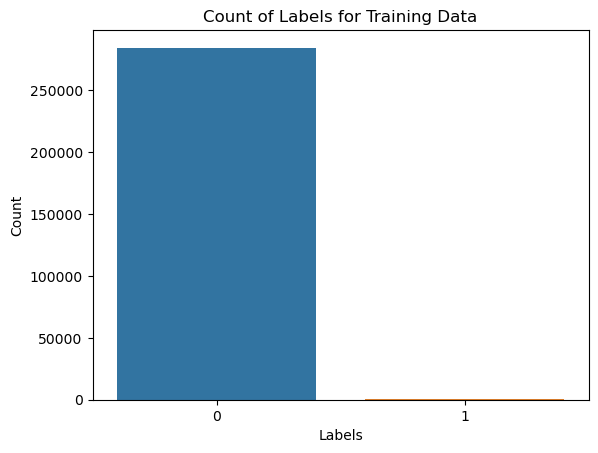

In [6]:
sns.countplot(data=data, x='Class')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Labels for Training Data')

#can see the large difference in the two classes - (0) non-fraudulent and (1) fraud
data.Class.value_counts()

array([[<AxesSubplot: title={'center': 'Time'}>,
        <AxesSubplot: title={'center': 'V1'}>,
        <AxesSubplot: title={'center': 'V2'}>,
        <AxesSubplot: title={'center': 'V3'}>,
        <AxesSubplot: title={'center': 'V4'}>,
        <AxesSubplot: title={'center': 'V5'}>],
       [<AxesSubplot: title={'center': 'V6'}>,
        <AxesSubplot: title={'center': 'V7'}>,
        <AxesSubplot: title={'center': 'V8'}>,
        <AxesSubplot: title={'center': 'V9'}>,
        <AxesSubplot: title={'center': 'V10'}>,
        <AxesSubplot: title={'center': 'V11'}>],
       [<AxesSubplot: title={'center': 'V12'}>,
        <AxesSubplot: title={'center': 'V13'}>,
        <AxesSubplot: title={'center': 'V14'}>,
        <AxesSubplot: title={'center': 'V15'}>,
        <AxesSubplot: title={'center': 'V16'}>,
        <AxesSubplot: title={'center': 'V17'}>],
       [<AxesSubplot: title={'center': 'V18'}>,
        <AxesSubplot: title={'center': 'V19'}>,
        <AxesSubplot: title={'center': 'V20'}

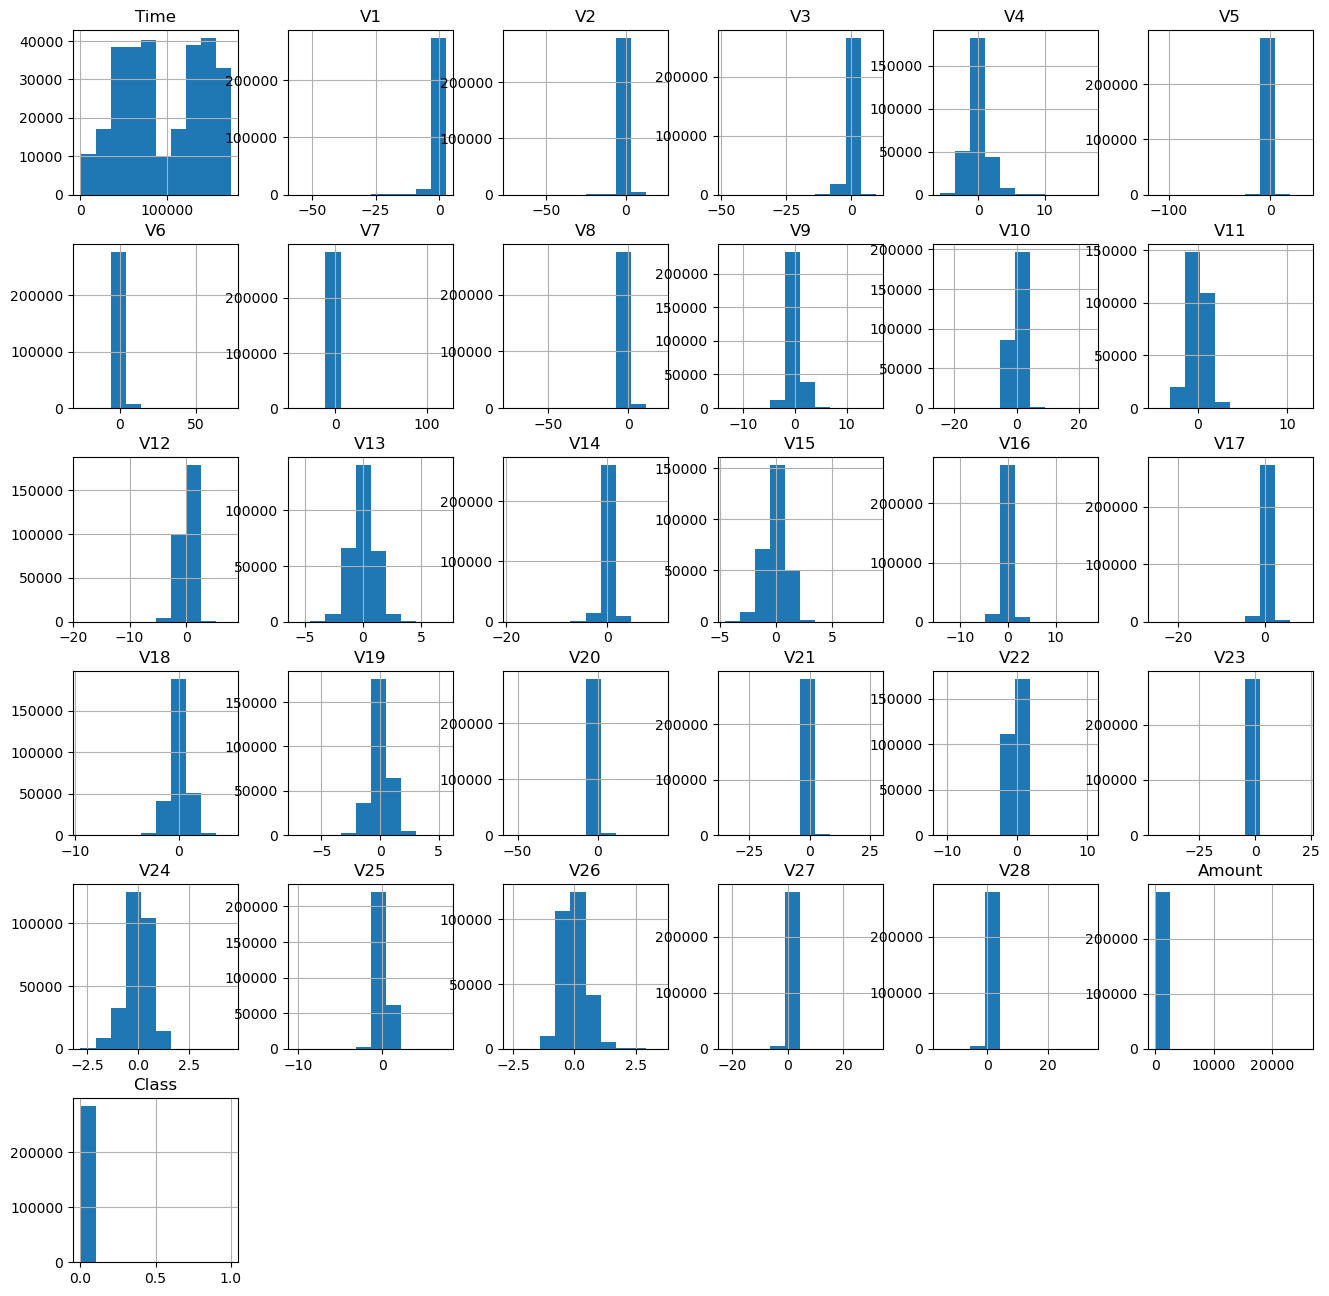

In [66]:
data.hist(figsize=(16, 16))

## 4. Pre-processing

In [7]:
X= data.drop('Class', axis =1)
y = data.Class.values
X.shape, y.shape

((284807, 30), (284807,))

In [8]:
nan_indices_X = np.isnan(X)
nan_indices_y = np.isnan(y)

# Check for infinite values in X
inf_indices_X = np.isinf(X)
inf_indices_y = np.isinf(y)

# Check if any NaN or infinite values exist
if np.any(nan_indices_X) or np.any(nan_indices_y):
    print("NaN values found in input data.")
print('all good')

if np.any(inf_indices_X) or np.any(inf_indices_y):
    print("Infinite values found in input data.")
else: 
    print('all good')

all good
all good


In [15]:
batch_size = 10000  # Adjust this based on your computational resources

num_batches = int(np.ceil(len(X) / batch_size))

# Initialize an empty list to store resampled batches
resampled_batches = []

# Initialize SMOTEENN object with k_neighbors parameter
sme = SMOTEENN(random_state=42, smote=SMOTE(k_neighbors=3))

# Process each batch separately
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(X))
    
    X_batch = X[start_idx:end_idx]
    y_batch = y[start_idx:end_idx]
    
    # Check if there are enough samples in the minority class for SMOTE
    if sum(y_batch == 1) >= 4:  # Adjust the threshold as needed
        # Apply SMOTEENN to the current batch
        X_resampled, y_resampled = sme.fit_resample(X_batch, y_batch)
    else:
        # If there are not enough samples in the minority class, skip SMOTE
        X_resampled, y_resampled = X_batch, y_batch
    
    # Append the resampled batch to the list
    resampled_batches.append((X_resampled, y_resampled))

# Concatenate resampled batches into final resampled dataset
X_resampled = np.concatenate([batch[0] for batch in resampled_batches])
y_resampled = np.concatenate([batch[1] for batch in resampled_batches])

In [21]:
#use a combination of under and over sampling using 'SMOTEENN'
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)

In [30]:
print(f"Sizes before SMOTEENN:", X.shape, y.shape)
print(f"Sizes after SMOTEENN:", X_res.shape, y_res.shape)

Sizes before SMOTEENN: (284807, 30) (284807,)
Sizes after SMOTEENN: (541135, 30) (541135,)


In [36]:
#get counts for labels in y 
unique_values, counts = np.unique(y_res, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

0: 265395
1: 275740


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=47)

## 5. Modeling

### 5a Logistic Regression

In [47]:
#have to scale data so data converges 
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [49]:
# using metrics module for accuracy calculation 
y_pred = pipe.predict(X_test)
print("Model Logistic Regression ROC AUC score {0:0.4f} : ", roc_auc_score(y_test, y_pred)) 

Model Logistic Regression ROC AUC score {0:0.4f} :  0.9815977669477752


In [62]:
# Predict probabilities for positive class
y_scores = pipe.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
# Calculate Area Under the Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

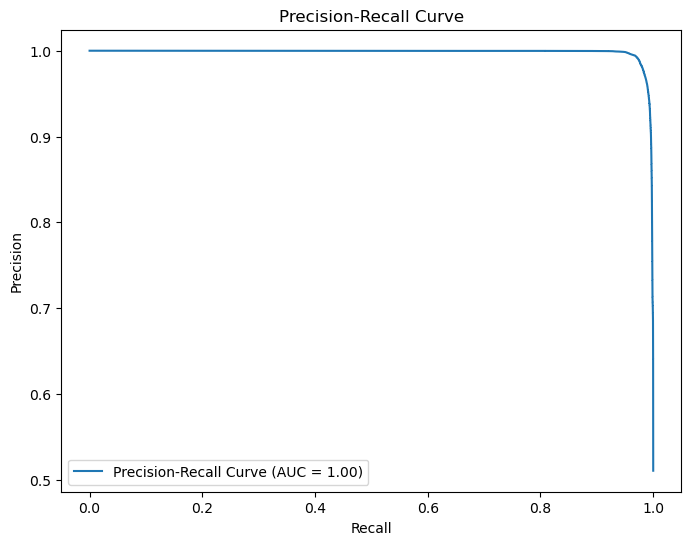

In [63]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### 5b Random Forest

In [50]:
model_rf = RandomForestClassifier(n_estimators = 100, random_state=0)   
  
# Train the model
model_rf.fit(X_train, y_train) 
  
# Make y predictions on the X_test data
y_pred_rf = model_rf.predict(X_test) 
  
# using metrics module for accuracy calculation 
print("Model Random Forest ROC AUC score {0:0.4f} : ", roc_auc_score(y_test, y_pred_rf)) 

Model Random Forest ROC AUC score {0:0.4f} :  0.9998759576876018


In [64]:
# Predict probabilities for positive class
y_scores = model_rf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
# Calculate Area Under the Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

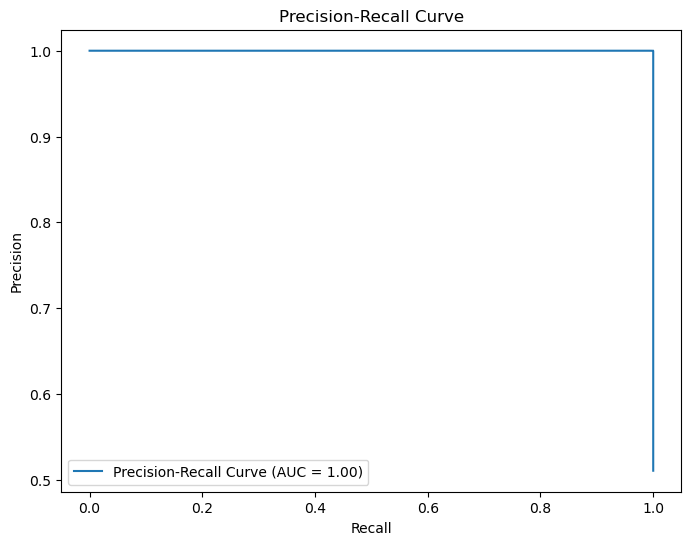

In [65]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## 6. Evaluation of Models & Summary

The project aimed to enhance credit card fraud detection using logistic regression and random forest classifiers. Initially, the dataset exhibited significant class imbalance, with 284,315 instances of label 0 and only 492 instances of label 1. To address this, the SMOTEENN technique was applied, resulting in a rebalanced dataset with 265,395 instances of label 0 and 275,740 instances of label 1.

After rebalancing, both logistic regression and random forest models were trained on the data. Evaluation was performed using precision-recall curves due to the dataset's imbalanced nature, aiming to mitigate the influence of skewed class distribution on model performance assessment.

Remarkably, both classifiers achieved an AUC score of 1 on the precision-recall graph, indicating exceptional performance in distinguishing between fraudulent and non-fraudulent transactions. This signifies that the models achieved perfect precision-recall trade-offs, maximizing precision while maintaining high recall rates. Such outcomes suggest that the models effectively identify fraudulent transactions while minimizing false positives, thus demonstrating significant promise for real-world credit card fraud detection applications.